Simple EDA notebook to display the images from the datasets and get familiar with the data.

In [1]:
from PIL import Image, ImageFilter
from os import walk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

%matplotlib inline

In [5]:
#Read image number n
def show_image(im_id):
    im = Image.open('data/images/stage_1_train_images_jpg/{}.jpg'.format(im_id))

    return plt.imshow(im, cmap=plt.cm.bone)

def show_batch(df):
    fig = plt.figure(figsize=(20, 15))
    columns = 5
    rows = 4

    for i in range(0, columns*rows):
        if i <= len(df):
            fig.add_subplot(rows, columns, i+1)
            show_image(df['ID'].iloc[i]) # removing ".jpg" from the filename
            if 'Label' in df:
                plt.title(df['Label'].iloc[i])

In [3]:
# Loading previously calculated image metadata
df_im_sum = pd.read_csv('data/filters/pixel_sum.csv')
df_black_pixels = pd.read_csv('data/filters/black_pixels.csv')

# Load and prepare labels
X = pd.read_csv('data/labels/stage_1_train.csv')
X = X.drop_duplicates(subset=['ID'])

X[['ID', 'Hem_Type']] = X['ID'].str.rsplit('_', n=1, expand=True)

X = X.merge(df_black_pixels, how='left', on='ID')
X = X.merge(df_im_sum, how='left', on='ID')

In [4]:
X.head()

,ID,Label,Hem_Type,Black_pixels,Pixel_sum
0,ID_63eb1e259,0,epidural,164078.0,4474681.0
1,ID_63eb1e259,0,intraparenchymal,164078.0,4474681.0
2,ID_63eb1e259,0,intraventricular,164078.0,4474681.0
3,ID_63eb1e259,0,subarachnoid,164078.0,4474681.0
4,ID_63eb1e259,0,subdural,164078.0,4474681.0


In [9]:
# Number of different hemorrhage types per image
X.groupby(by='ID')['Label'].sum().value_counts()

0    577155
2     67969
3     22587
4      5642
5       885
6        20
Name: Label, dtype: int64

In [10]:
# Number of positive observations per hemorrhage type
X.groupby(by='Hem_Type')['Label'].sum()

Hem_Type
any                 97103
epidural             2761
intraparenchymal    32564
intraventricular    23766
subarachnoid        32122
subdural            42496
Name: Label, dtype: int64

In [11]:
# Checking that 'any' necessarily comes with at least one other type of hemmorrhage
any_hem = X[(X['Hem_Type']=='any')&(X['Label']==1)]['ID'].to_list()
X[X['ID'].isin(any_hem)].groupby(by='ID')['Label'].sum().min()

2

C:\Users\Davy\Anaconda3\envs\torch\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Davy\Anaconda3\envs\torch\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


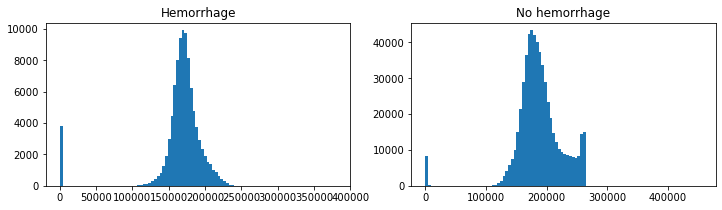

In [13]:
fig = plt.figure(figsize=(12, 3))
fig.add_subplot(1, 2, 1)
plt.hist(X[(X['Hem_Type']=='any') & (X['Label']==1)]['Black_pixels'], bins=100)
plt.title('Hemorrhage')
fig.add_subplot(1, 2, 2)
plt.hist(X[(X['Hem_Type']=='any') & (X['Label']==0)]['Black_pixels'], bins=100)
plt.title('No hemorrhage')
plt.show()

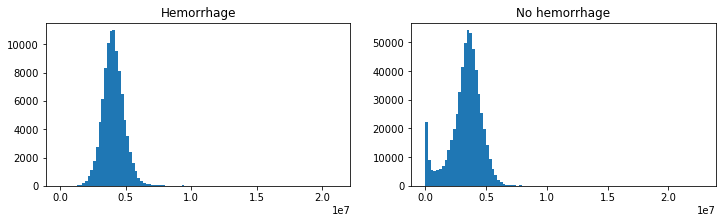

In [16]:
fig = plt.figure(figsize=(12, 3))
fig.add_subplot(1, 2, 1)
plt.hist(X[(X['Hem_Type']=='any') & (X['Label']==1)]['Pixel_sum'], bins=100)
plt.title('Hemorrhage')
fig.add_subplot(1, 2, 2)
plt.hist(X[(X['Hem_Type']=='any') & (X['Label']==0)]['Pixel_sum'], bins=100)
plt.title('No hemorrhage')
plt.show()

We can throw away from the training set all the images that either have less than 100k pixel sum value or more than 250k black pixels: they do not contain enough information to detect a hemorrhage, as shown by the fact that no positive observation is outside of this range.

Let's show random "extreme" images to convince ourselves that they're not useful and should be removed from the train dataset.

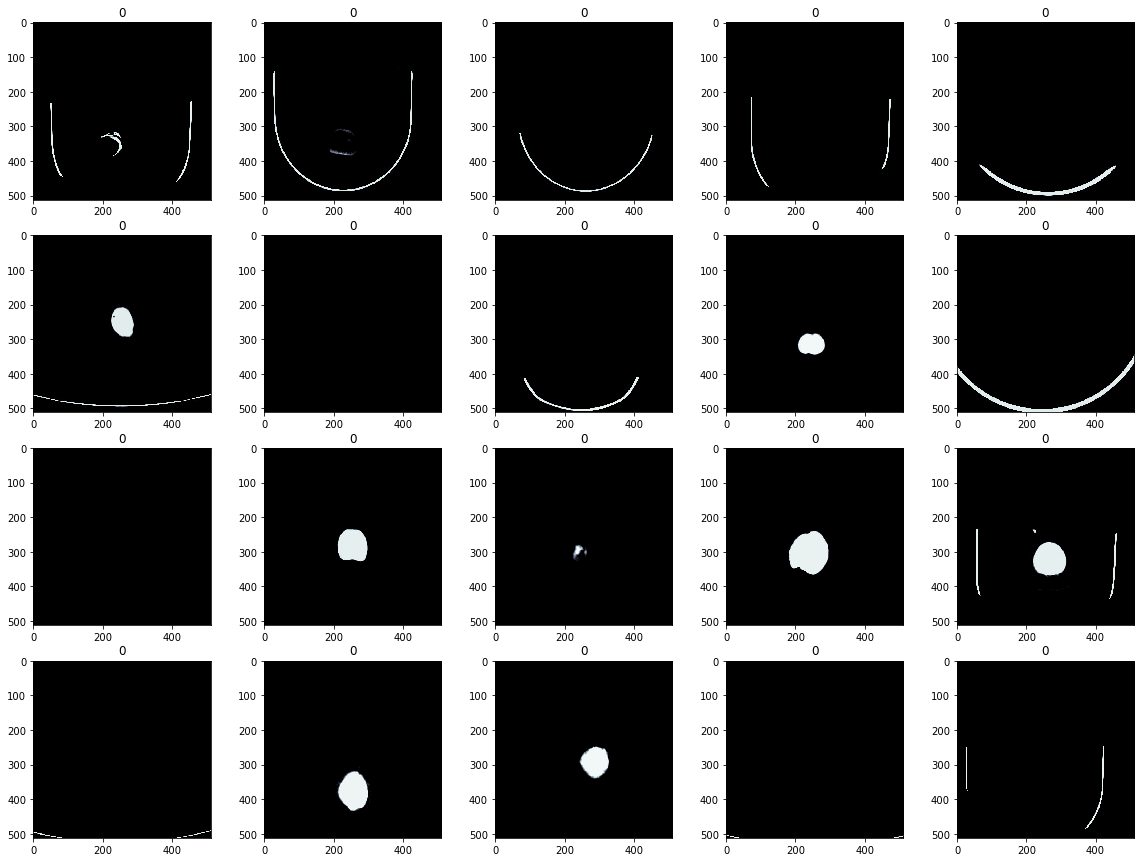

In [17]:
show_batch(X[X['Black_pixels'] > 250000].sample(20))

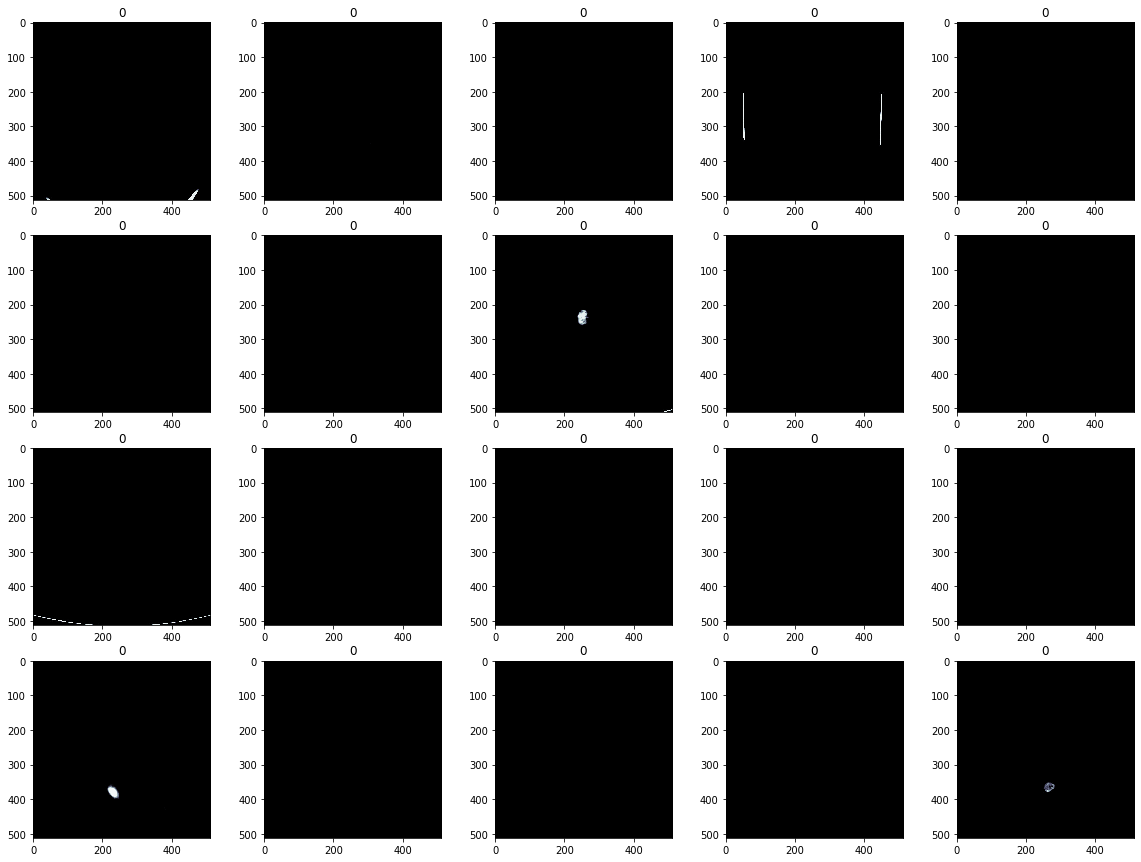

In [193]:
show_batch(X[X['Pixel_sum'] < 100000].sample(20))